In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define LeNet-5 model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        self.pool = nn.AvgPool2d(2, stride=2)

    def forward(self, x):
        x = self.pool(self.tanh(self.conv1(x)))
        x = self.pool(self.tanh(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.tanh(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    



    




In [ ]:
# Lists to store train and test accuracies
train_accuracies = []
test_accuracies = []

# Training the model with a progress bar
for epoch in range(epochs):
    model.train()
    train_loss = 0
    correct = 0
    with tqdm(total=len(train_loader), desc=f"Epoch {epoch + 1}/{epochs}", unit="batch") as pbar:
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            pbar.update(1)

    train_loss /= len(train_loader.dataset)
    train_accuracy = 100. * correct / len(train_loader.dataset)
    train_accuracies.append(train_accuracy)
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")

    # Evaluate on the test set
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            test_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    test_accuracies.append(test_accuracy)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")



Epoch 1/10:   0%|          | 0/938 [00:00<?, ?batch/s]

Epoch 1/10: 100%|██████████| 938/938 [00:16<00:00, 56.92batch/s]


Train Loss: 0.0820, Train Accuracy: 97.43%
Test Loss: 0.0698, Test Accuracy: 97.81%


Epoch 2/10: 100%|██████████| 938/938 [00:16<00:00, 57.83batch/s]


Train Loss: 0.0582, Train Accuracy: 98.16%
Test Loss: 0.0639, Test Accuracy: 97.94%


Epoch 3/10: 100%|██████████| 938/938 [00:19<00:00, 47.24batch/s]


Train Loss: 0.0475, Train Accuracy: 98.54%
Test Loss: 0.0493, Test Accuracy: 98.37%


Epoch 4/10: 100%|██████████| 938/938 [00:20<00:00, 45.47batch/s]


Train Loss: 0.0373, Train Accuracy: 98.80%
Test Loss: 0.0464, Test Accuracy: 98.43%


Epoch 5/10: 100%|██████████| 938/938 [00:21<00:00, 43.57batch/s]


Train Loss: 0.0312, Train Accuracy: 98.98%
Test Loss: 0.0510, Test Accuracy: 98.50%


Epoch 6/10: 100%|██████████| 938/938 [00:24<00:00, 38.94batch/s]


Train Loss: 0.0270, Train Accuracy: 99.17%
Test Loss: 0.0460, Test Accuracy: 98.59%


Epoch 7/10: 100%|██████████| 938/938 [00:21<00:00, 44.34batch/s]


Train Loss: 0.0216, Train Accuracy: 99.29%
Test Loss: 0.0473, Test Accuracy: 98.62%


Epoch 8/10: 100%|██████████| 938/938 [00:21<00:00, 43.51batch/s]


Train Loss: 0.0205, Train Accuracy: 99.33%
Test Loss: 0.0534, Test Accuracy: 98.58%


Epoch 9/10: 100%|██████████| 938/938 [00:25<00:00, 36.13batch/s]


Train Loss: 0.0176, Train Accuracy: 99.41%
Test Loss: 0.0517, Test Accuracy: 98.58%


Epoch 10/10: 100%|██████████| 938/938 [00:19<00:00, 47.54batch/s]


Train Loss: 0.0142, Train Accuracy: 99.53%
Test Loss: 0.0543, Test Accuracy: 98.55%


NameError: name 'plt' is not defined

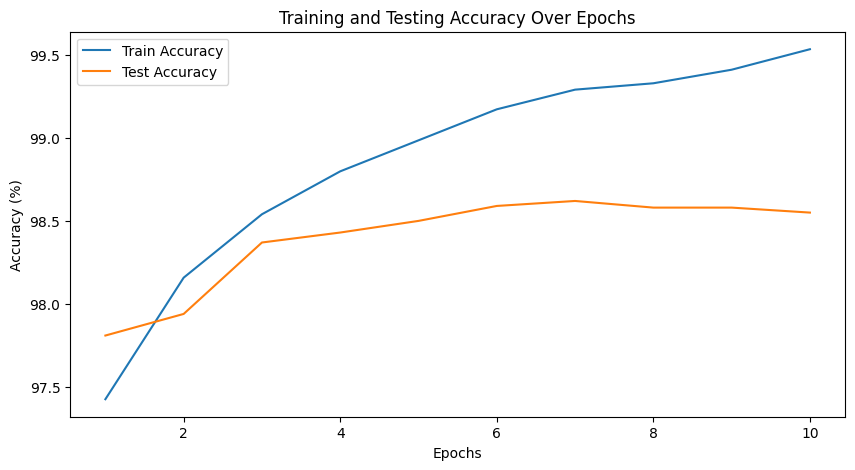

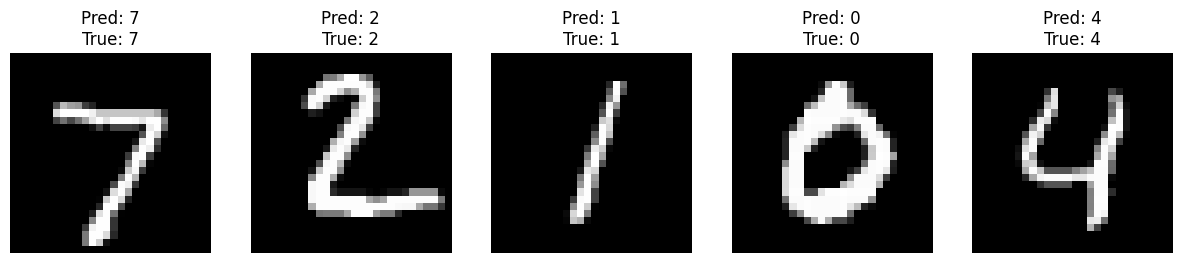

In [16]:
# Plotting train and test accuracies
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy Over Epochs')
plt.legend()
plt.show()

# Plotting a few test results
def plot_results(model, test_loader):
    model.eval()
    images, labels = next(iter(test_loader))
    outputs = model(images)
    _, preds = torch.max(outputs, 1)
    
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    for i, ax in enumerate(axes):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f"Pred: {preds[i].item()}\nTrue: {labels[i].item()}")
        ax.axis('off')
    plt.show()

plot_results(model, test_loader)